In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
class System:
    def __init__(self, name, t_eval, stocks):
        self.name = name
        self.t_eval = t_eval
        self.stocks = stocks
        
    def run(self):
        qts = []
        
        for s in self.stocks:
            qts.append(s.qt_init)
        
        def dx_dt(t, x): 
            dotx = self.stocks[0].dx_dt(t, x[0])
            doty = self.stocks[1].dx_dt(t, x[1])
            return np.array([dotx, doty])
            
        sol = solve_ivp(dx_dt, [0, 131], qts, t_eval=t_eval)
        
        for i in range(len(self.stocks)):
            self.stocks[i].push_vals(sol.y[i])
            
        return sol

In [3]:
class Stock:
    def __init__(self, name, qt_init, flow_in, flow_out, is_loop=True):
        self.name = name
        self.qt_init = qt_init
        self.flow_in = flow_in
        self.flow_out = flow_out
        self.is_loop = is_loop
        self.values = []
        
    def dx_dt(self, t, x):
        f_in = self.flow_in.calculate()
        f_out = self.flow_out.calculate()
        return (f_in - f_out) * (x if self.is_loop else 1)
    
    def push_vals(self, vals):
        self.values = vals

In [4]:
class Flow:
    def __init__(self, name, fn):
        self.name = name
        self.fn = fn
        
    def calculate(self):
        return self.fn()

In [5]:
def drawStockEvol(t, xs, stock):
    plt.figure(figsize = (12, 4))
    for x in xs:
        plt.plot(t, x)
    plt.xlabel('Year')
    plt.ylabel(stock)
    plt.show()

In [6]:
p_init = 1.65e9
BR = Flow("Birth Rate", lambda : 0.05)
DR = Flow("Death Rate", lambda : 0.02)
pop = Stock("Population", p_init, BR, DR, True)

In [7]:
p_init2 = 0.5e9
BR2 = Flow("Birth Rate", lambda : 0.05)
DR2 = Flow("Death Rate", lambda : 0.02)
pop2 = Stock("Population", p_init2, BR2, DR2, True)

In [8]:
t_eval = np.arange(0, 130, 1)
syst = System("World2", t_eval, [pop, pop2])

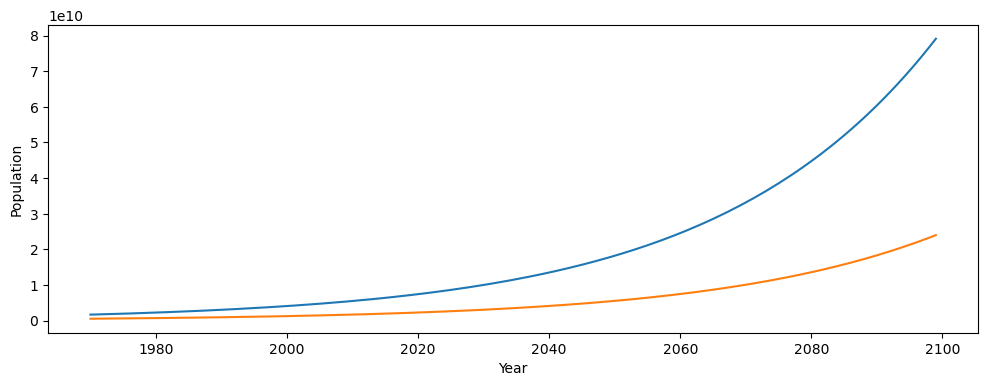

In [9]:
sol2 = syst.run()
drawStockEvol(sol2.t + 1970, [pop.values, pop2.values], 'Population')